# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/es/zwq/data/train.p'
testing_file = '/home/es/zwq/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

#how about cross-validation?

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

<Container object of 44 artists>

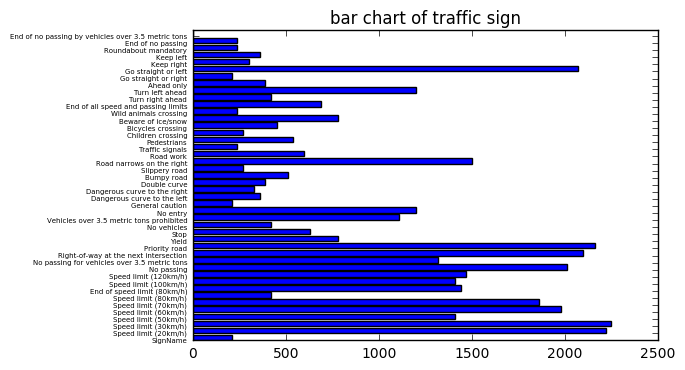

In [88]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import csv
import random

# Visualizations will be shown in the notebook.
%matplotlib inline
csvf = open('signnames.csv','r')
csvfReader = csv.reader(csvf)
signDict = {}#hold sign name dict
name=[]
for row in csvfReader:
    signDict[row[0]] = row[1]
    name.append(row[1])

signNum=[0 for i in range(len(signDict))] 

for i in range(y_train.shape[0]):
    signNum[y_train[i]] +=1
    
plt.figure('bar chart of traffic sign')
plt.title('bar chart of traffic sign')
plt.yticks(range(len(signNum)),name,size=5)
plt.barh(range(len(signNum)),signNum)


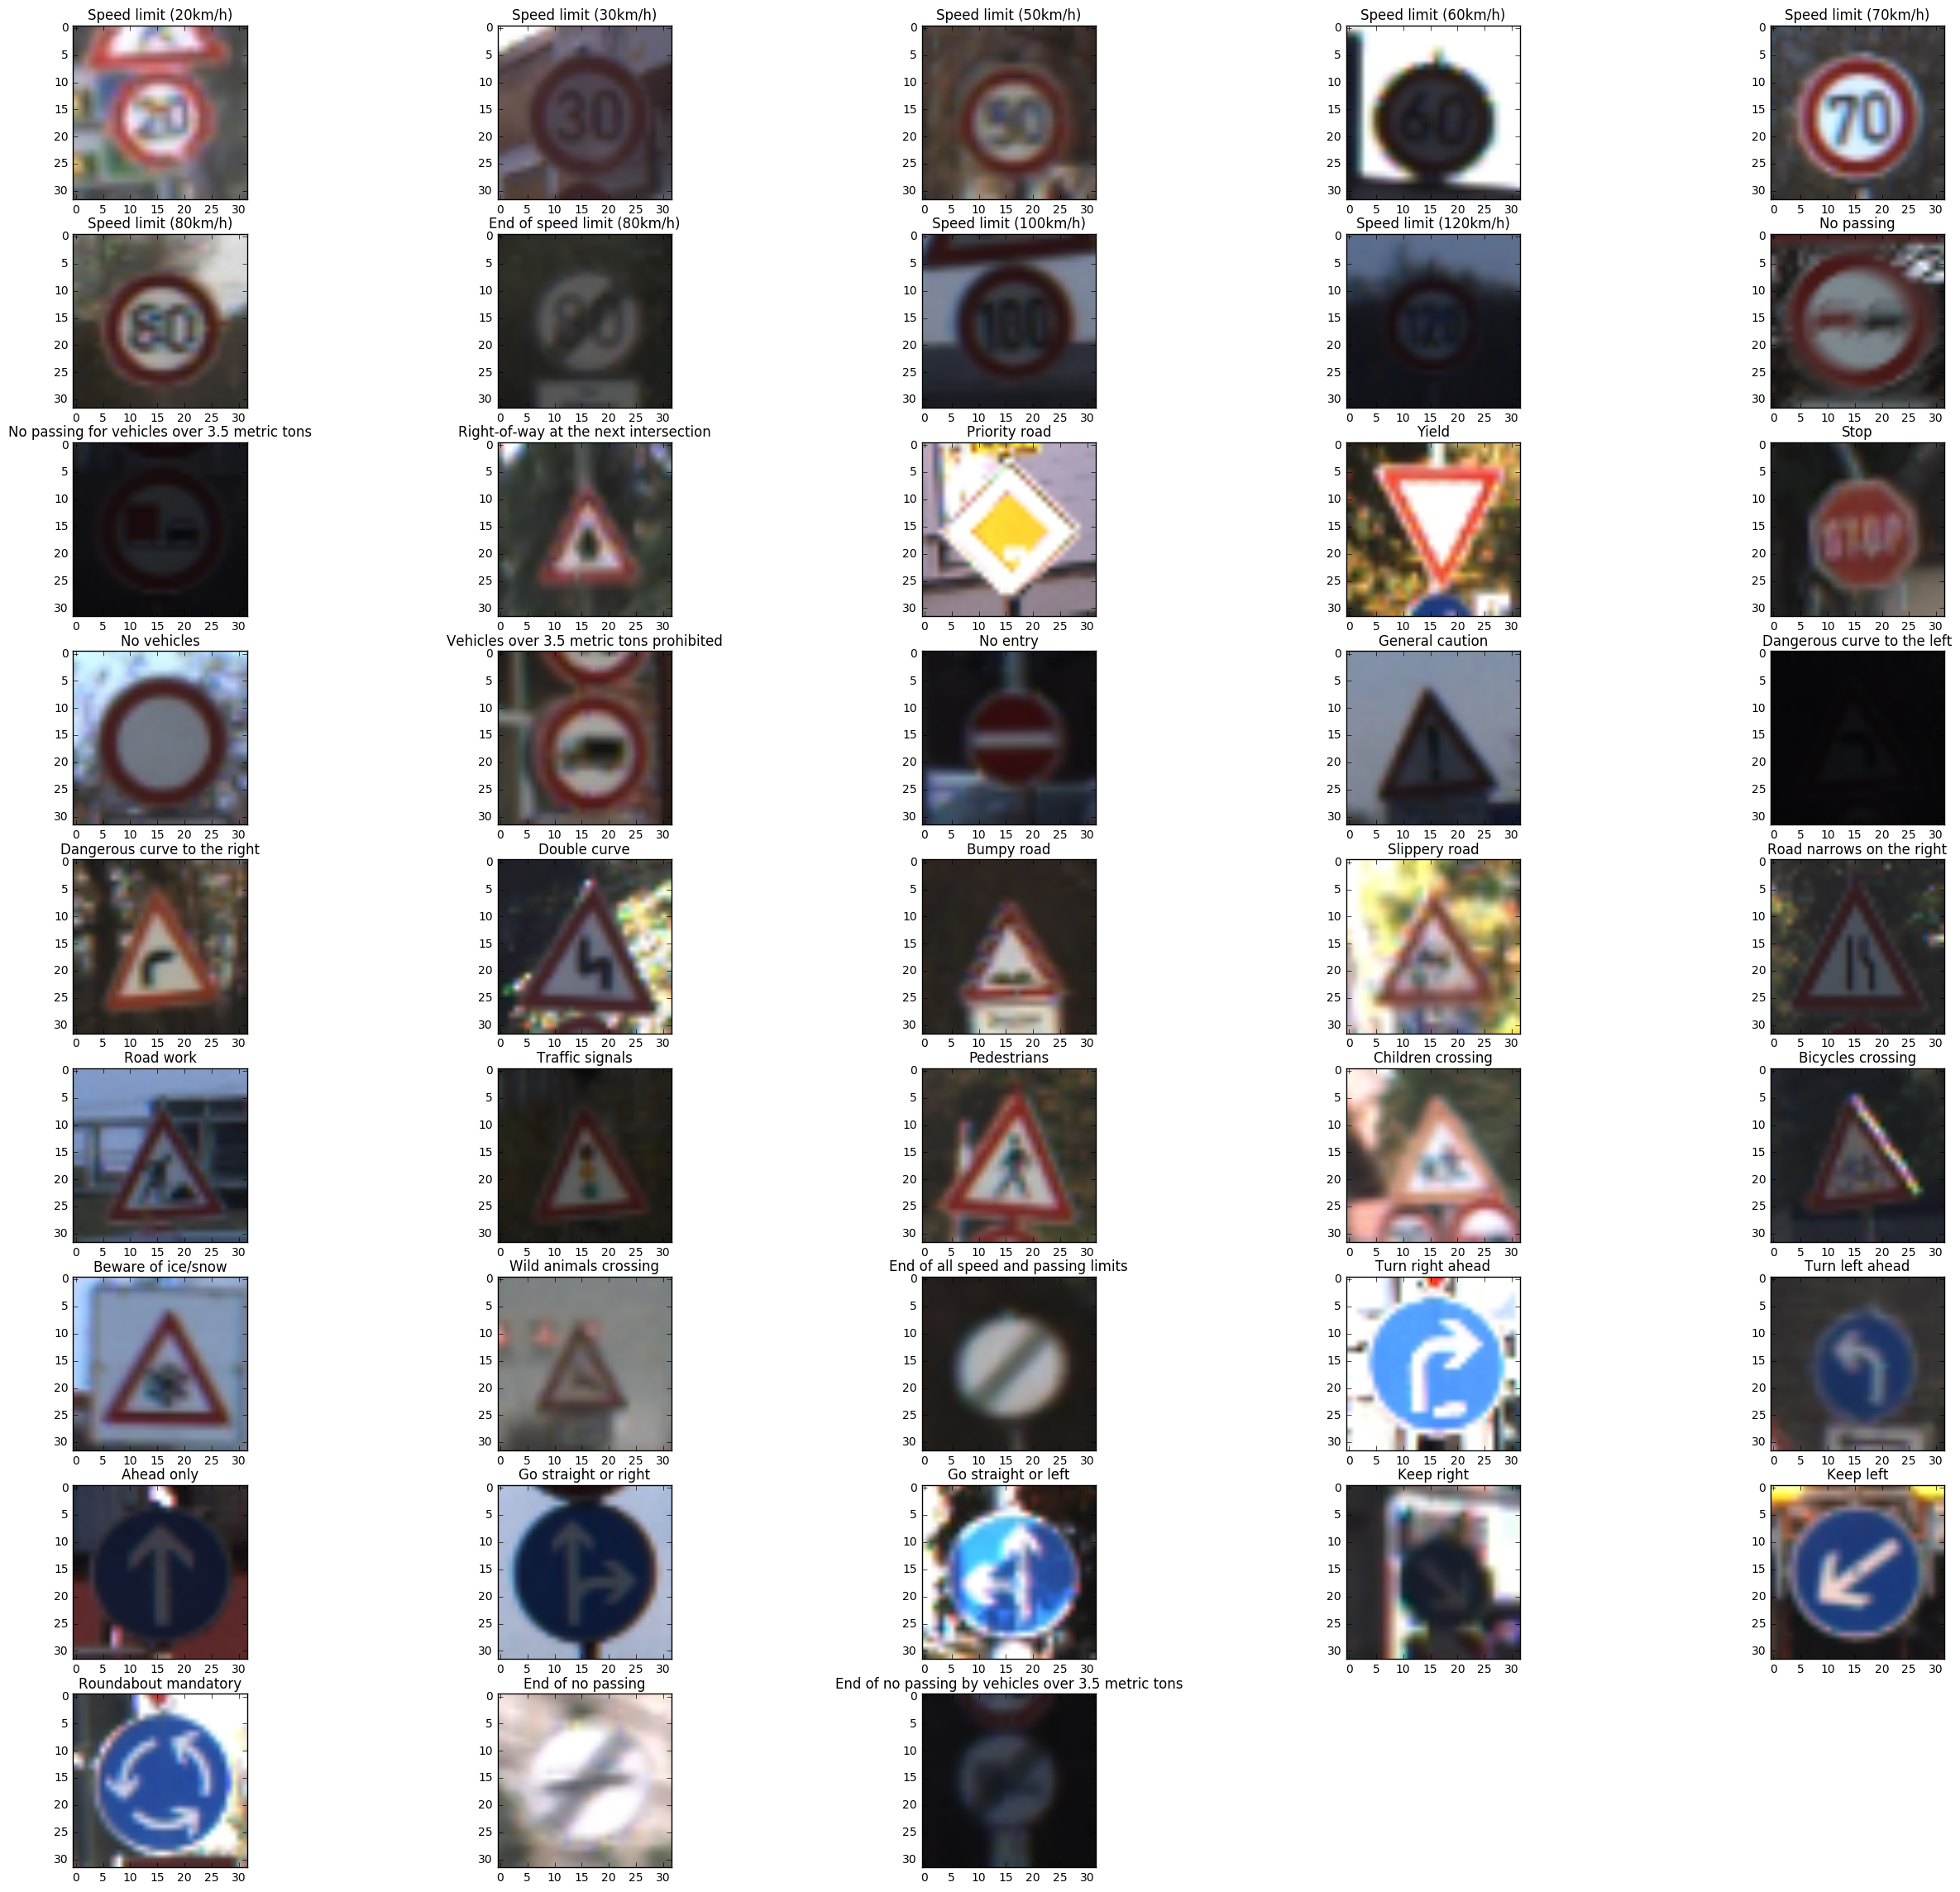

In [84]:
i = random.randrange(0, y_train.shape[0])

plt.figure('sign and name',figsize=[32,32])


for i in range(n_classes):
    indRange = np.where(y_train==i)# get the sign number and value
    ind = random.choice(indRange[0])
    plt.subplot(10,5,i+1)
    plt.title(signDict[str(y_train[ind])])
    plt.imshow(X_train[ind])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [89]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Shuffle the data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_test,y_test = shuffle(X_test, y_test)

In [90]:
#Normalize the features
#Implement Min-Max scaling for grayscale image data
"""
    Normalize the image data with Min-Max scaling to a range of [-0.5, 0.5]
    :param image_data: The image data to be normalized
    :param rangeA, rangeB: value range [rangeA, rangeB]
    :return: Normalized image data
"""
def normalize_grayscale(image_data, rangeA = -.5, rangeB=.5):
    grayscale_min = 0
    grayscale_max = 255
    return rangeA + ( ( (image_data - grayscale_min)*(rangeB - rangeA) )/( grayscale_max - grayscale_min ) )
X_normalized = normalize_grayscale(X_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**:
1. to shuffle the data, for the data images are taken sequentially, after shuffle data are in random order.
2. to normalize image features from 0-255 to [-.5, .5].


In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#split data into training and validation sets
"""
    Split data to training and validation sets
    :param X_trainData, y_trainData: The image data to be normalized
    :param split: percentage of train_data will be split to validation sets
    :return: splitted data sets [newTrainData, validationData]
"""
def split_data(X_trainData, y_trainData, split=0.2):
    k = int(1/split)
    #print (X_trainData.shape)
    X_trainFolds = np.array(np.array_split(X_trainData, k))
    y_trainFolds = np.array(np.array_split(y_trainData, k))
    i = random.randrange(0, k)
    init = False
    for j in range(k):
        if j!=i:
            if init == True:
                X_tr = np.concatenate((X_tr,X_trainFolds[j]))
                y_tr = np.concatenate((y_tr,y_trainFolds[j]))
            else:
                X_tr = X_trainFolds[j]
                y_tr = y_trainFolds[j]
                init = True
    X_va = np.array(X_trainFolds[i])
    y_va = np.array(y_trainFolds[i])
    return X_tr, X_va, y_tr, y_va
X_norm_split, X_valid, y_tr, y_va = split_data(X_normalized,y_train)

#X_norm_split=X_norm_split[:]
print ('X_normalized shape: {}'.format(X_normalized.shape))
print ('X_norm_split shape: {}'.format(X_norm_split.shape))
print ('X_valid shape: {}'.format(X_valid.shape))

print ('y_train shape: {}'.format(y_train.shape))
print ('y_tr shape: {}'.format(y_tr.shape))
print ('y_va shape: {}'.format(y_va.shape))


X_normalized shape: (39209, 32, 32, 3)
X_norm_split shape: (31367, 32, 32, 3)
X_valid shape: (7842, 32, 32, 3)
y_train shape: (39209,)
y_tr shape: (31367,)
y_va shape: (7842,)


In [9]:
#One-hot Encode the labels
#but not used
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
#traning set
y_one_hot_tr = label_binarizer.fit_transform(y_tr)
#validation set
y_one_hot_va = label_binarizer.fit_transform(y_va)
#test set
y_one_hot_test = label_binarizer.fit_transform(y_test)
#print (y_one_hot_test)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
1. I simply split data sets to 5 parts, and randomly pick one part as validation set, and retain the test set in case of over fitting.
2. TODO: can generate new data by **rotation, translation, blur, scale**. It helps to ading deformations to ConvNets.

In [10]:
#import tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
EPOCHS = 30
BATCH_SIZE = 128

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Dropout Layer
    conv1 = tf.nn.dropout(conv1, keep_prob)

    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [24]:
#Trainning Pipeline
rate = 0.001

logits = LeNet(x)
soft_max = tf.nn.softmax(logits)# to be used later
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [25]:
#Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [26]:
#Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_norm_split)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        #X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_norm_split[offset:end], y_tr[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_valid, y_va)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.747

EPOCH 2 ...
Validation Accuracy = 0.862

EPOCH 3 ...
Validation Accuracy = 0.928

EPOCH 4 ...
Validation Accuracy = 0.952

EPOCH 5 ...
Validation Accuracy = 0.958

EPOCH 6 ...
Validation Accuracy = 0.961

EPOCH 7 ...
Validation Accuracy = 0.965

EPOCH 8 ...
Validation Accuracy = 0.973

EPOCH 9 ...
Validation Accuracy = 0.974

EPOCH 10 ...
Validation Accuracy = 0.975

EPOCH 11 ...
Validation Accuracy = 0.980

EPOCH 12 ...
Validation Accuracy = 0.980

EPOCH 13 ...
Validation Accuracy = 0.980

EPOCH 14 ...
Validation Accuracy = 0.983

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.984

EPOCH 17 ...
Validation Accuracy = 0.979

EPOCH 18 ...
Validation Accuracy = 0.984

EPOCH 19 ...
Validation Accuracy = 0.986

EPOCH 20 ...
Validation Accuracy = 0.987

EPOCH 21 ...
Validation Accuracy = 0.985

EPOCH 22 ...
Validation Accuracy = 0.987

EPOCH 23 ...
Validation Accuracy = 0.986

EPOCH 24 ...
Validation Accura

In [28]:
#Evaluae the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.839


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
1. I modify the model from LeNet-5 with dropout and max pooling to accept 3-channel data, and output 43 logits
2. Layers : 5
        layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
        layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
        layer 3: Fully Connected. Input = 400. Output = 120
        layer 4: Fully Connected. Input = 120. Output = 84.
        layer 5: Fully Connected. Input = 84. Output = 43.
3. connectivity:    
    layer 1 -> max_pool -> layer 2 -> max_pool -> layer 3 -> layer 4 -> layer 5

In [29]:
### Save Summary for tensorboard
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    writer = tf.summary.FileWriter('./graph', sess.graph)
    print ('Summary saved')

Summary saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1. Optimizer : AdamOptimizer
2. Batch size : 128
3. Epochs : 30
4. Hyperparameters: 1.batch size, 2. epochs, 3. validation set size

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. Follow the example from CarND-LeNet-Lab, and modify that LeNet-5 to a AlexNet
2. Check the gramer of Tensorflow from the webisites
3. to have a look at the [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) mentioned in this project
4. split the training set to perform cross-validation

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

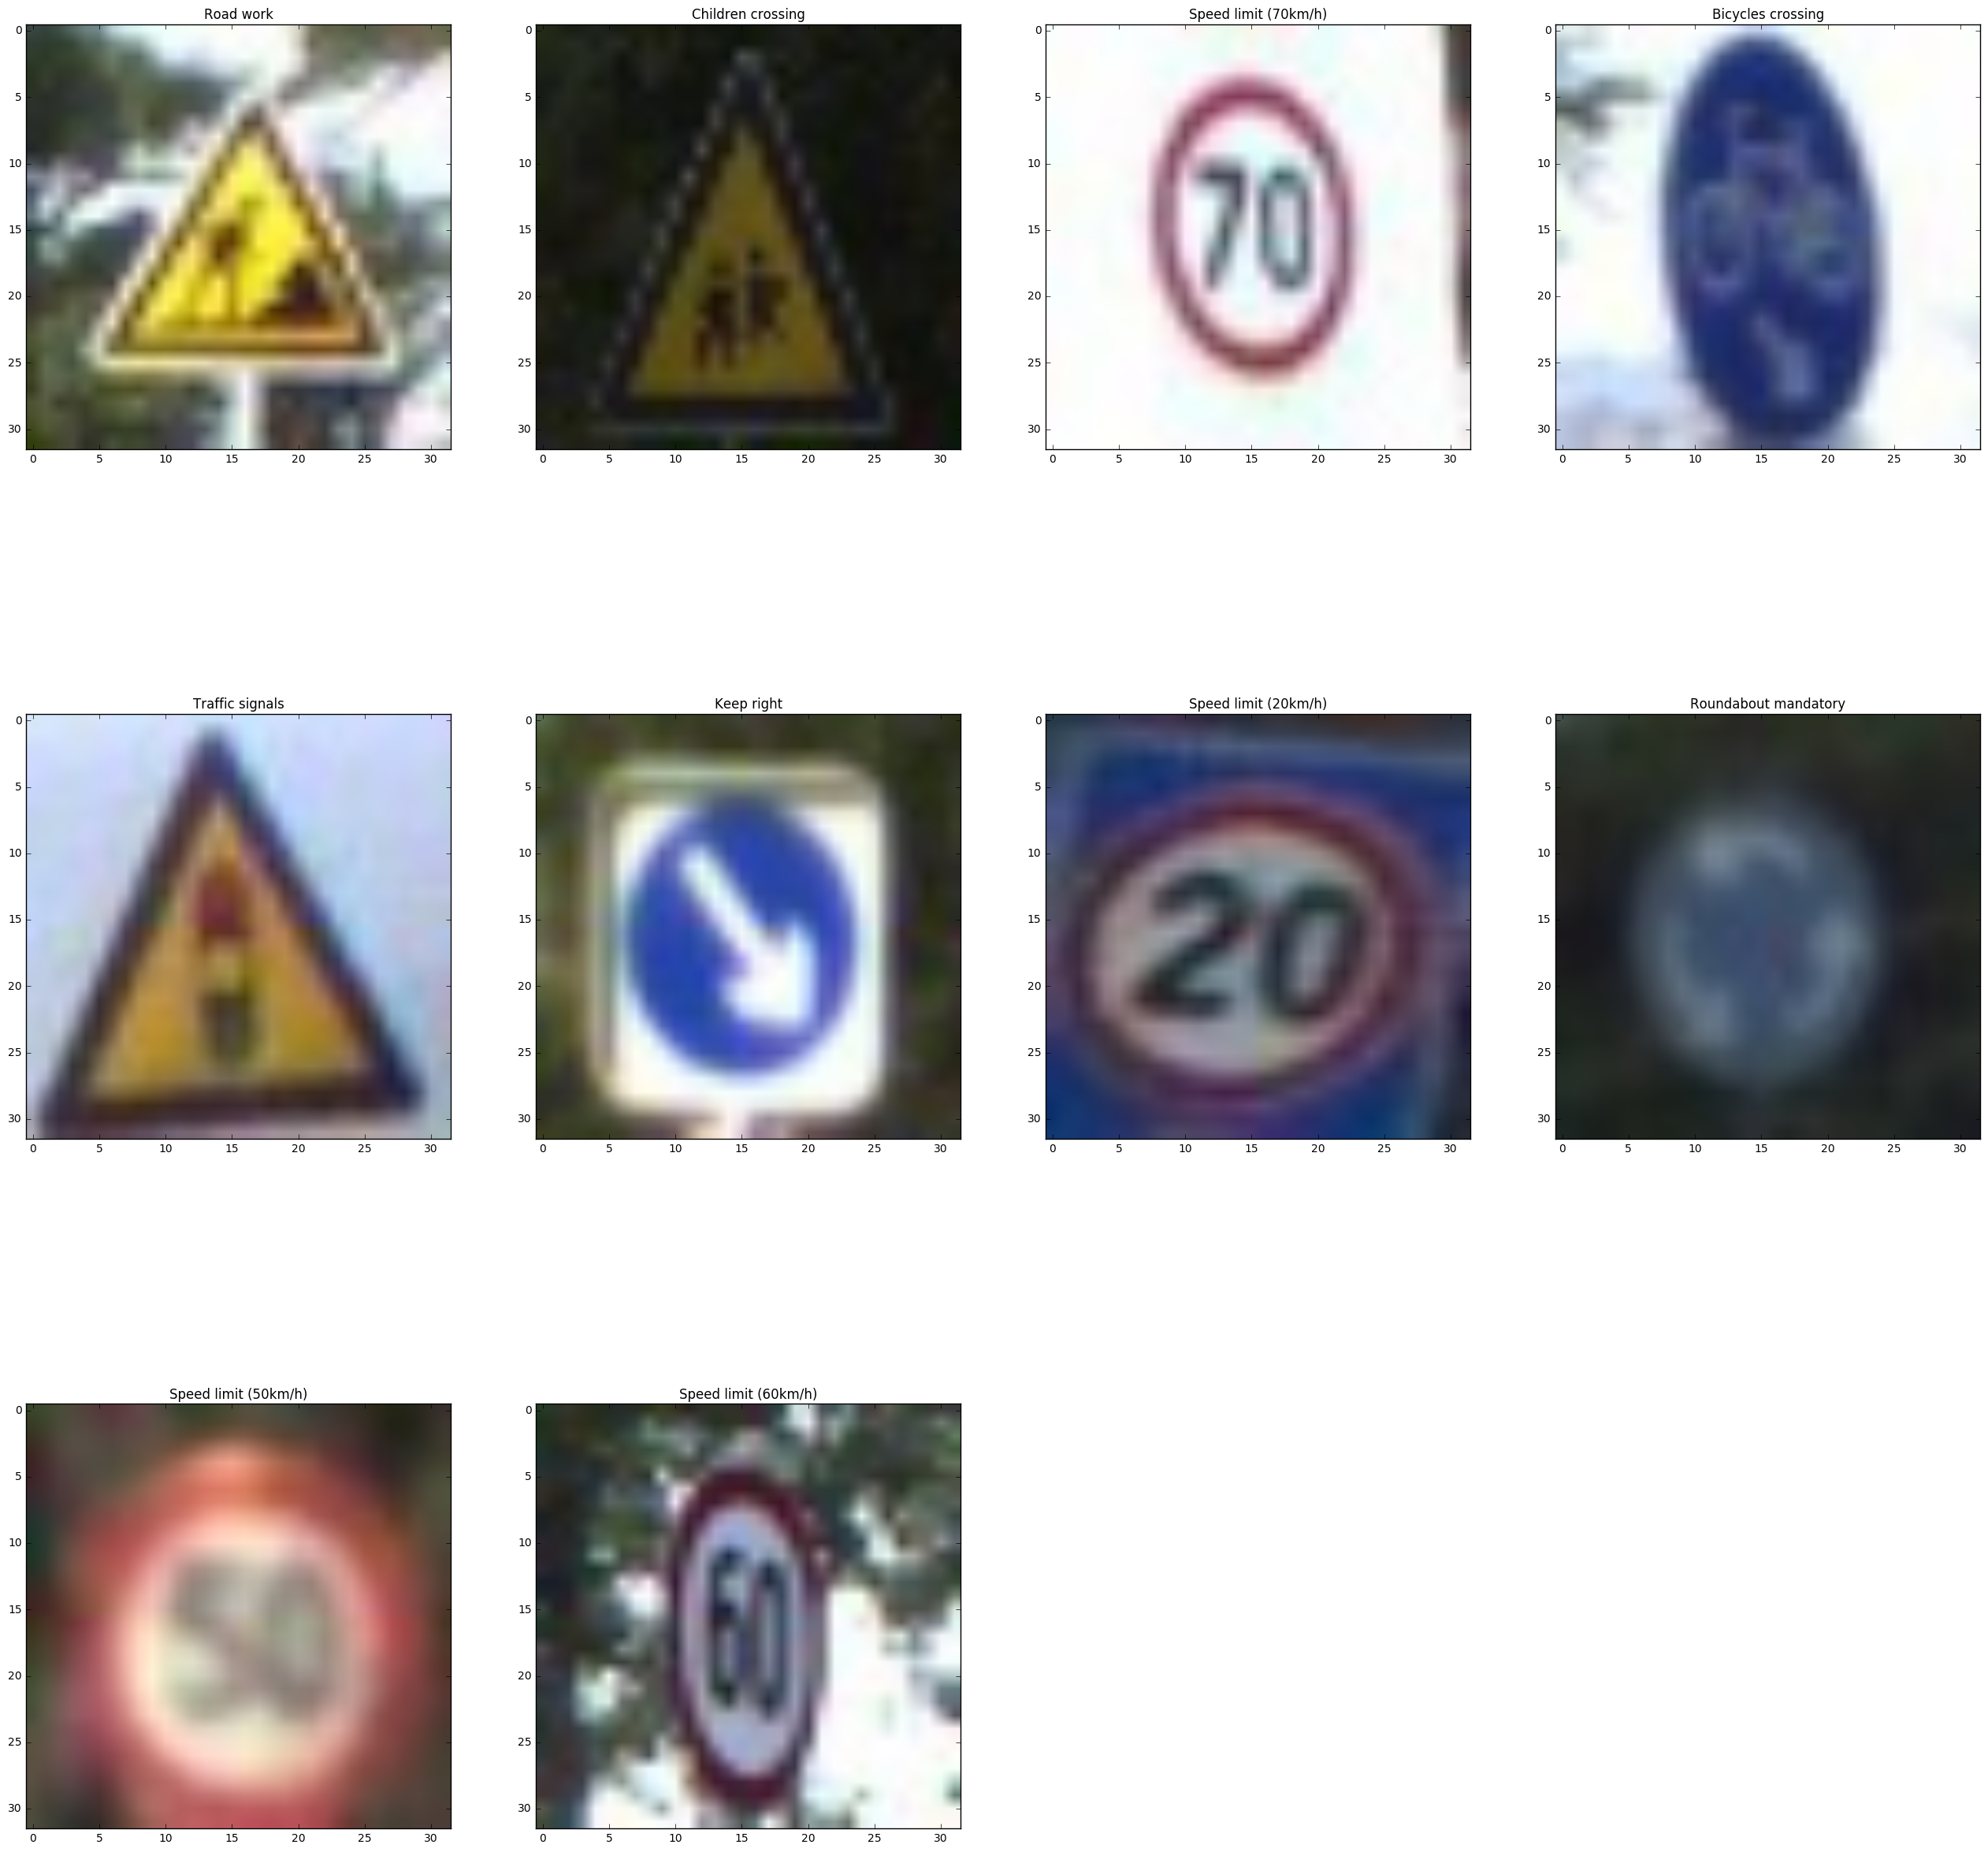

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
img = []# image list
plt.figure('new image sign',figsize=[32,32])
imLabl = np.array([25, 28, 4, 29, 26, 38, 0, 40, 2, 3])# image label
for i in range(1,11):
    plt.subplot(3,4,i)
    jpgs = plt.imread('./pic/'+str(i)+'.jpg')
    plt.title(signDict[str(imLabl[i-1])])
    img.append(jpgs)
    plt.imshow(img[i-1])
plt.show()

In [91]:
imArr = np.array(img) # to check the shape of image list
print (imArr.shape)

(10, 32, 32, 3)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
1. because those signs are all from China, so some color may be different from the German Dataset
2. some signs are blured
3. some signs are not front facing the camara

In [56]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
print (imLabl)
imNorm = normalize_grayscale(imArr)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(imNorm, imLabl)
    imgArr_soft_max = sess.run(soft_max, feed_dict={x:imNorm,keep_prob:1})
    print("Test Accuracy = {:.3f}".format(test_accuracy))
   #print (imgArr_soft_max)

[25 28  4 29 26 38  0 40  2  3]
Test Accuracy = 0.500


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Not the same, it's only 50% accurate

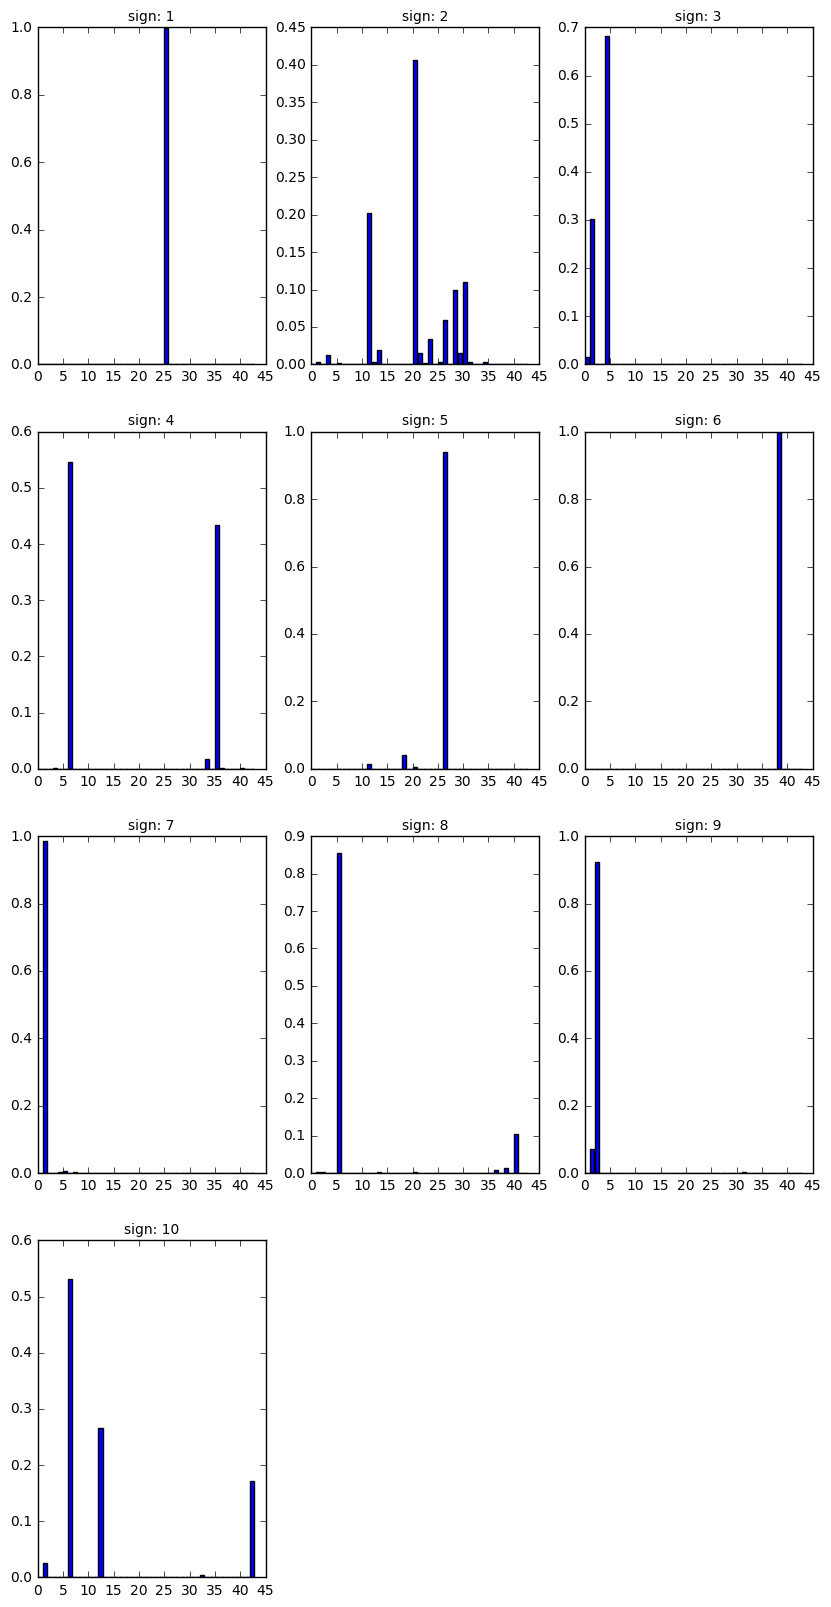

In [110]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
plt.figure('pie probilities',figsize=[10,20])
for i in range(len(imgArr_soft_max)):
    plt.subplot(4,3,i+1)
    plt.title('sign: '+ str(i+1),fontsize=10)
    plt.bar(range(43),imgArr_soft_max[i])
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [105]:
top_k = tf.nn.top_k(soft_max, k=3, sorted=True, name=None)
with tf.Session() as sess:
    output = sess.run(top_k,feed_dict={soft_max:imgArr_soft_max})
    print (output)

# to print which picture is true positive or false positive
print ()
for i in zip(output.indices,imLabl):
    print ('indices :{},\t actual :{}, \t correct: {} '.format(i[0],i[1],i[0][0]==i[1]))

TopKV2(values=array([[  9.99417543e-01,   4.06644249e-04,   1.47994782e-04],
       [  4.06326562e-01,   2.02756092e-01,   1.09410331e-01],
       [  6.81316316e-01,   3.02098542e-01,   1.63291413e-02],
       [  5.45540571e-01,   4.34157521e-01,   1.72615070e-02],
       [  9.40835178e-01,   3.97418588e-02,   1.46254003e-02],
       [  1.00000000e+00,   1.02797796e-11,   1.12755324e-12],
       [  9.86724198e-01,   6.59990869e-03,   4.45799017e-03],
       [  8.55886281e-01,   1.05013467e-01,   1.46781877e-02],
       [  9.24408913e-01,   7.23685771e-02,   2.12552096e-03],
       [  5.31154215e-01,   2.65777647e-01,   1.71366557e-01]], dtype=float32), indices=array([[25, 12, 29],
       [20, 11, 30],
       [ 4,  1,  0],
       [ 6, 35, 33],
       [26, 18, 11],
       [38, 36, 34],
       [ 1,  5,  7],
       [ 5, 40, 38],
       [ 2,  1, 31],
       [ 6, 12, 42]], dtype=int32))

indices :[25 12 29],	 actual :25, 	 correct: True 
indices :[20 11 30],	 actual :28, 	 correct: False 
in

**Answer:**
It's shown above, as well as the correctness.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to" 
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.